In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt  


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

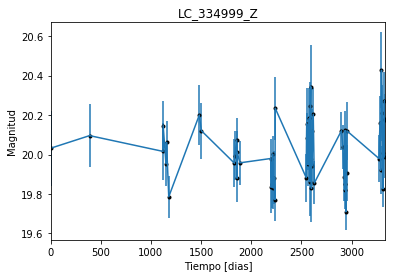

In [2]:
data = np.genfromtxt('LC_334999_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_334999_Z')
plt.savefig("LC_334999_Z.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

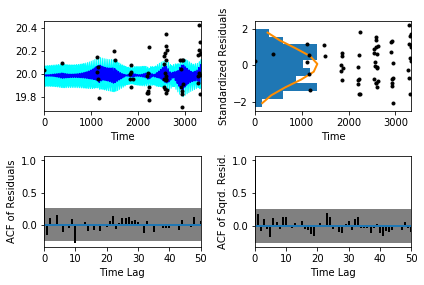

In [5]:
sample.assess_fit()

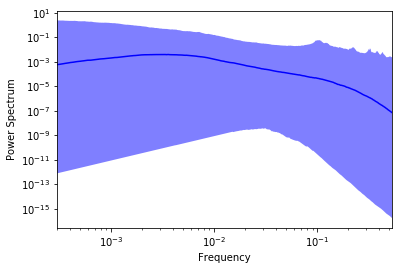

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

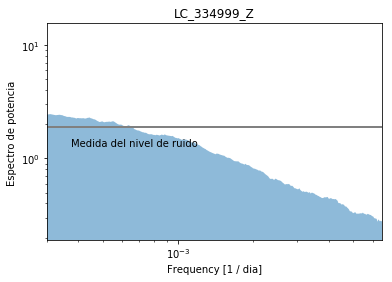

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_334999_Z')
plt.savefig("Medida del nivel de ruido_Z.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_334999_Z')

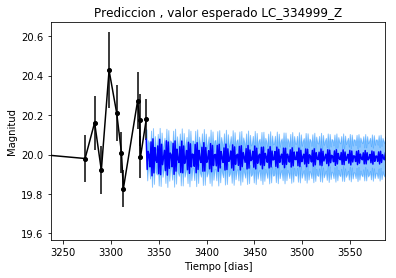

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_334999_Z')

Text(0.5,1,'Prediccion, Caminos simulados_LC_334999_Z')

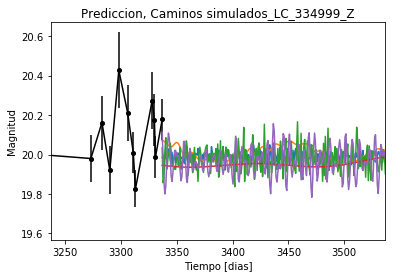

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_334999_Z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


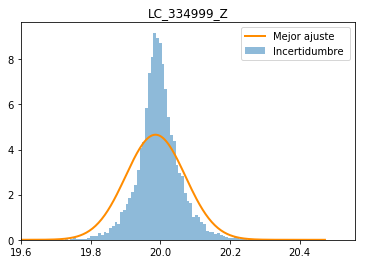

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_334999_Z')
plt.savefig("Mejor_ajuste_LC_334999_Z.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_334999_Z')

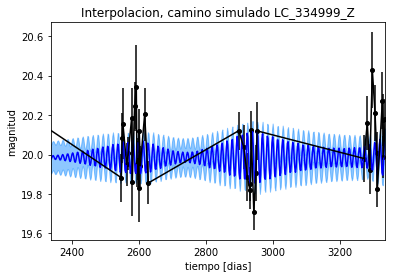

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_334999_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_334999_Z')

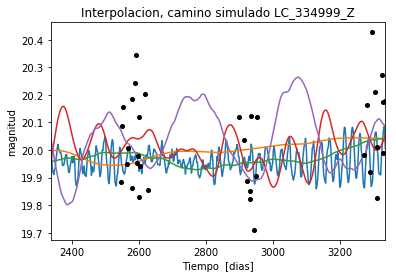

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_334999_Z')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 986.736407459
Median: 0.00810344784062
Standard deviation: 0.164305848168
68% credibility interval: [ 0.00093361  0.10447978]
95% credibility interval: [  3.58140393e-04   6.53796864e-01]
99% credibility interval: [  3.08971589e-04   9.74646187e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 967.759217809
Median: 0.00538057345383
Standard deviation: 0.109077905427
68% credibility interval: [ 0.00077994  0.06047981]
95% credibility interval: [  3.51135403e-04   3.77263091e-01]
99% credibility interval: [  3.08971589e-04   6.92330344e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 557.551740753
Median: 0.017794448436


In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 2866.60393744
Median: 57.6498642928
Standard deviation: 1.37613940167
68% credibility interval: [ 56.17367795  58.54740756]
95% credibility interval: [ 53.96768996  59.59368343]
99% credibility interval: [ 52.18423039  60.24110356]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 508.087292554
Median: 0.646706937419
Standard deviation: 2.34218310164
68% credibility interval: [ 0.06895062  4.02164609]
95% credibility interval: [ 0.01584701  8.10474165]
99% credibility interval: [  1.01910681e-02   1.13743789e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 614.21006092
Median: 2.76681140133
Standard deviation: 13.4594169208
68% credibility interval: [  0.11510626  20.6791686 ]
95% credibility interval: [  3.8

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 33881.5299759
Median: 8.36016994843e+13
Standard deviation: 1.1114414147e+112
68% credibility interval: [  1.06635990e-33   4.53824745e+58]
95% credibility interval: [  1.48083649e-113   7.13220177e+081]
99% credibility interval: [  4.54335954e-131   2.46835337e+107]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2297.22632888
Median: 19.9939206039
Standard deviation: 0.0227360859754
68% credibility interval: [ 19.97413891  20.01477209]
95% credibility interval: [ 19.95199232  20.0393602 ]
99% credibility interval: [ 19.93288831  20.06701475]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 462.317352921
Median: 0.181360983033
Standard deviation: 0.29953370478
68% credibility interval: [ 0.00418536  0.65122553]
95% credibility interval: [ 0.          0.97794317]
99% credibility interval: [ 0.          1.04400575]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 462.317352921
Median: 0.181360983033
Standard deviation: 0.29953370478
68% credibility interval: [ 0.00418536  0.65122553]
95% credibility interval: [ 0.          0.97794317]
99% credibility interval: [ 0.          1.04400575]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 638.476134621
Median: 0.000757502991428
Standard deviation: 0.119581748029

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 2866.60393744
Median: 57.6498642928
Standard deviation: 1.37613940167
68% credibility interval: [ 56.17367795  58.54740756]
95% credibility interval: [ 53.96768996  59.59368343]
99% credibility interval: [ 52.18423039  60.24110356]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2685.01673104
Median: 0.00256090505445
Standard deviation: 0.0044761004864
68% credibility interval: [ 0.0004743   0.00754029]
95% credibility interval: [  1.48934370e-05   1.50155926e-02]
99% credibility interval: [  1.01560160e-06   2.24813090e-02]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1883.65260485
Median: 1.14375004984
Standard deviation: 0.186577278152
68% credibility interval: [ 0.9701921   1.33529602]
95% credibility interval: [ 0.8228768   1.55311357]
99% credibility interval: [ 0.72931441  1.71482145]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 866.961888893
Median: 1.79831787669e-16
Standard deviation: 1.33211387236
68% credibility interval: [  1.21670828e-60   4.24774916e-03]
95% credibility interval: [  3.35775603e-84   7.35350200e-01]
99% credibility interval: [  3.79002522e-111   8.71759700e+000]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 986.736407459
Median: (-0.0509154644097-0.272531516473j)
Standard deviation: 2.14657788732
68% credibility interval: [-0.65646582-0.96443326j -0.00586607-0.28980335j]
95% credibility interval: [ -4.10792685e+00-5.70659271j  -2.25026246e-03-0.01760087j]
99% credibility interval: [ -6.12388260e+00+0.j          -1.94132575e-03-5.52948975j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 967.759217809
Median: (-0.0338071400693+0.577016238848j)
Standard deviation: 2.002931553
68% credibility interval: [-0.38000587+4.33078419j -0.00490053+0.44301718j]
95% credibility interval: [ -2.37041391e+00+5.96364484j  -2.20624881e-03+0.j        ]
99% credibility interval: [ -4.35003985e+00+3.8423692j   -1.94132575e-03+5.52948975j]
Post